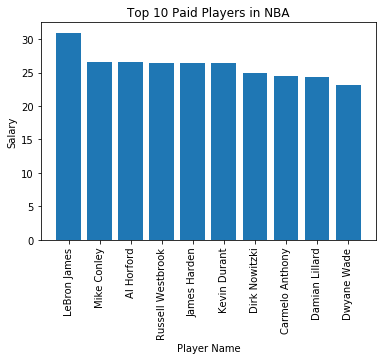

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("nba_2017_with_salary.csv")
df2 = pd.read_csv("nba_2017_salary_twitter.csv")

salary = df.loc[:,['PLAYER', 'SALARY_MILLIONS']]
salary = salary.sort_values(['SALARY_MILLIONS'], ascending = False)

players = []
salaries = []
for index, row in salary.iterrows():
    players.append(row['PLAYER'])
    salaries.append(row['SALARY_MILLIONS'])

plt.bar(players[:10], salaries[:10])
plt.title("Top 10 Paid Players in NBA")
plt.xlabel("Player Name")
plt.ylabel("Salary")
plt.xticks(rotation='vertical')
plt.show()

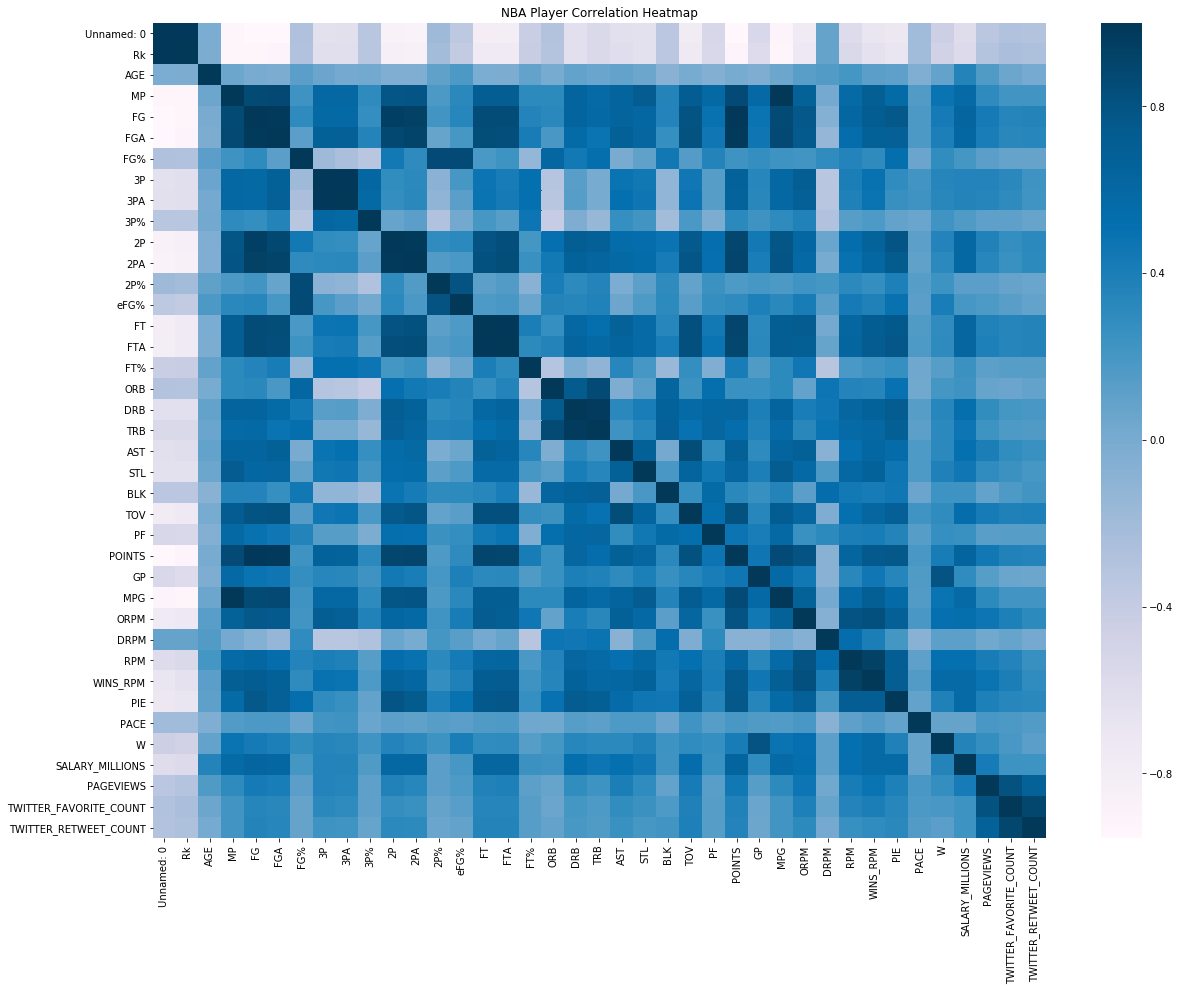

In [3]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("NBA Player Correlation Heatmap")
corr = df2.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap = "PuBu")

In [4]:
salaryGroup = []     ###CREATING THE SALARY BRACKETS FOR MODEL PREDICTION###
for i, row in df2.iterrows():
    salary = row['SALARY_MILLIONS']
    if salary <= 5.0:
        salaryGroup.append(0)
    elif salary <= 10.0:
        salaryGroup.append(1)
    elif salary <= 15.0:
        salaryGroup.append(2)
    elif salary <= 20.0:
        salaryGroup.append(3)
    elif salary <= 25.0:
        salaryGroup.append(4)
    else:
        salaryGroup.append(5)

df2 = df2.assign(SalaryGroup=salaryGroup)

In [5]:
from sklearn.model_selection import train_test_split

clean = df2.drop(['Unnamed: 0', 'PLAYER', 'POSITION', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB' 
            , 'eFG%', 'PF', 'TEAM', 'GP', 'PIE', 'PACE', 'W', 'SALARY_MILLIONS', 'PAGEVIEWS', 'TWITTER_FAVORITE_COUNT', 'TWITTER_RETWEET_COUNT'], axis=1)
clean.head() ##cleaning the data for unwanted variables

,Rk,AGE,MP,FG,FGA,TRB,AST,STL,BLK,TOV,POINTS,MPG,ORPM,DRPM,RPM,WINS_RPM,SalaryGroup
0,1,28,34.6,10.2,24.0,10.7,10.4,1.6,0.4,5.4,31.6,34.6,6.74,-0.47,6.27,17.34,5
1,2,27,36.4,8.3,18.9,8.1,11.2,1.5,0.5,5.7,29.1,36.4,6.38,-1.57,4.81,15.54,5
2,4,23,36.1,10.3,20.3,11.8,2.1,1.3,2.2,2.4,28.0,36.1,0.45,3.90,4.35,12.81,4
3,6,26,34.2,9.0,19.9,11.0,4.6,1.4,1.3,3.7,27.0,34.2,3.56,0.64,4.20,11.26,3
4,7,26,35.9,8.8,19.8,4.9,5.9,0.9,0.3,2.6,27.0,35.9,4.63,-1.49,3.14,10.72,4


In [6]:
train, test = train_test_split(clean, test_size=0.2)
rk = []
for i, row in test.iterrows():
    rk.append(int(row['Rk']))
train.head()

,Rk,AGE,MP,FG,FGA,TRB,AST,STL,BLK,TOV,POINTS,MPG,ORPM,DRPM,RPM,WINS_RPM,SalaryGroup
32,41,31,34.0,6.2,14.1,7.7,3.7,1.3,0.9,2.3,18.1,34.0,1.23,3.35,4.58,11.51,4
128,193,34,27.6,3.3,4.9,11.5,0.6,0.7,0.5,1.4,8.4,27.6,-1.06,2.20,1.14,3.55,2
105,154,19,21.5,3.6,8.9,2.6,2.1,0.6,0.3,1.4,9.9,21.5,0.06,-1.57,-1.51,1.86,0
141,213,26,26.1,2.7,7.0,1.9,4.7,0.7,0.0,1.8,7.6,26.1,-0.88,-1.01,-1.89,1.54,1
66,85,24,29.8,4.9,11.3,4.0,3.2,1.2,0.6,1.2,13.7,29.8,0.13,0.18,0.31,4.72,1


In [7]:
totrain = train.drop(['SalaryGroup', 'Rk'], axis = 1)
totest = test.drop(['SalaryGroup', 'Rk'], axis = 1)

In [8]:
model1 = BernoulliNB()
model2 = AdaBoostClassifier()
model3 = RandomForestClassifier(n_estimators=70)
model4 = KNeighborsClassifier()
model5 = LogisticRegression()

In [9]:
model1.fit(totrain, train['SalaryGroup'])
model2.fit(totrain, train['SalaryGroup'])
model3.fit(totrain, train['SalaryGroup'])
model4.fit(totrain, train['SalaryGroup'])
model5.fit(totrain, train['SalaryGroup'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
result1 = model1.predict(totest)

In [11]:
result2 = model2.predict(totest)

In [12]:
result3 = model3.predict(totest)

In [13]:
result4 = model4.predict(totest)

In [14]:
result5 = model5.predict(totest)

In [15]:
outcome = pd.DataFrame()
outcome = outcome.assign(Rk = rk)
outcome = outcome.assign(SalaryGroup=result3)
outcome.to_csv('output.csv')

In [16]:
outcome.head()

,Rk,SalaryGroup
0,232,2
1,169,1
2,140,2
3,132,0
4,195,0


In [17]:
newData = pd.read_csv('output.csv')

In [18]:
numCorrect = 0;
numTotal = 0;
for i,row in newData.iterrows():
    _rk = row['Rk']
    _salGroup = row['SalaryGroup']
    check = clean.loc[clean['Rk'] == _rk]
    salReal = check['SalaryGroup'].values[0]
    if _salGroup == salReal:
        numCorrect += 1
    numTotal += 1
print "The prediction returned accuracy of: ", float(numCorrect)/numTotal

The prediction returned accuracy of:  0.458333333333
